In [1]:
import numpy as np
import xlrd
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import yfinance  as yf
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import random


In [3]:
Raw_data=pd.read_excel('LD_NET.xlsx')
Raw_data.head()

,LoadDay,MW01,MW02,MW03,MW04,MW05,MW06,MW07,MW08,MW09,...,MW15,MW16,MW17,MW18,MW19,MW20,MW21,MW22,MW23,MW24
0,1988-01-01,6081,5771,5598,5543,5453,5418,5233,5353,5537,...,5288,5317,5535,6143,6242,6019,5854,5711,5728,5506
1,1988-01-02,5213,4929,4728,4723,4768,4962,5037,5546,6117,...,6060,6031,6106,6750,7075,6765,6506,6348,6456,6136
2,1988-01-03,5831,5548,5369,5319,5340,5459,5488,5904,6438,...,6503,6462,6576,7272,7581,7413,7197,7042,6813,6548
3,1988-01-04,5969,5625,5606,5622,5679,5886,6263,7052,8389,...,9099,9005,9160,9565,9610,9034,8565,8299,8314,7844
4,1988-01-05,7089,6899,6888,6866,6914,7096,7386,8049,9207,...,9455,9352,9490,9942,9941,9407,8917,8612,8505,7973


In [4]:
data1=Raw_data.iloc[:11621,3]  # lenght 11621 is 2019/10/31. so we have to look back 5 -year data which means 
data1=data1.fillna(0)
data=data1.values

In [5]:
def convertToSeries(input_series, lookback):
    matrix_load=[]
    for i in range(len(input_series)-lookback):
        matrix_load.append(np.hstack(input_series[i:i+lookback]))
    return matrix_load
        

In [6]:
lookback=60
matrix_array=convertToSeries(data, lookback)
matrix_array=np.array(matrix_array)


In [7]:
from sklearn.preprocessing import StandardScaler


In [176]:
def Train_test_split(input_matrix, ratio):
    
    train_len=int(ratio*len(matrix_array))
    X_train=input_matrix[:train_len,:-1]
    y_train=input_matrix[:train_len, -1]
    X_test=input_matrix[train_len:, :-1]
    y_test=input_matrix[train_len:, -1]
    
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test=Train_test_split(matrix_array, 0.95)


In [177]:

y_train=y_train.reshape(-1, 1)
ScalerX=StandardScaler().fit(X_train)
ScalerY=StandardScaler().fit(y_train)

C:\Users\Krishna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Krishna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [178]:
X_train1=ScalerX.transform(X_train)
y_train1=ScalerY.transform(y_train)
X_test1=ScalerX.transform(X_test)

X_train1Reshaped=np.reshape(X_train1, (X_train.shape[0], X_train.shape[1], 1))
X_test1Reshaped=np.reshape(X_test1, (X_test.shape[0], X_test.shape[1], 1))

C:\Users\Krishna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Krishna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Krishna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
# sess=tf.Session()
# input_dim=lookback
# h1_dim=100
# output_dim=1
# X_data=tf.placeholder(tf.float32, shape=[None, input_dim])
# y_data=tf.placeholder(tf.float32, shape=[output_dim])

# # first layer 
# W1=tf.Variable(tf.random.truncated_normal(shape=[input_dim, h1_dim], mean=0.0, stddev=0.1, dtype=tf.float32))
# b1=tf.Variable(tf.random.truncated_normal(shape=[h1_dim], mean=0.0,  stddev=0.1, dtype=tf.float32))
# h1=tf.nn.tanh(tf.add(tf.matmul(X_data, W1), b1))
              
# # Second layer 
# W2=tf.Variable(tf.random.truncated_normal(shape=[h1_dim, output_dim], mean=0.0, stddev=0.1, dtype=tf.float32))
# b2=tf.Variable(tf.random.truncated_normal(shape=[output_dim], mean=0.0, stddev=0.1, dtype=tf.float32))
# Model_output= tf.add(tf.matmul(h1, W2), b2)

# # loss function/ variable initialzier + optimizer  
# loss =tf.reduce_mean(tf.square(Model_output - y_data))
# init=tf.global_variables_initializer()
# sess.run(init)
# my_opt=tf.train.GradientDescentOptimizer(learning_rate=0.001)
# train_step=my_opt.minimize(loss)


In [179]:
sess=tf.Session()
input_dim=59
hidden_dim=40
output_dim=1

X_data=tf.placeholder(tf.float32, shape=[None, input_dim])
y_data=tf.placeholder(tf.float32, shape=[None, output_dim])

# Hidden layer 1
W1=tf.Variable(tf.truncated_normal(shape=[input_dim, hidden_dim], mean=0.0, stddev=0.1, dtype=tf.float32))
b1=tf.Variable(tf.truncated_normal(shape=[hidden_dim], mean=0.0, stddev=0.1, dtype=tf.float32))
h1=tf.nn.relu(tf.add(tf.matmul(X_data, W1), b1))

# the size of data will be None*hidden_dim
# hidden layer 2
W2=tf.Variable(tf.truncated_normal(shape=[hidden_dim, output_dim], mean=0.0, stddev=0.5, dtype=tf.float32))
b2=tf.Variable(tf.truncated_normal(shape=[output_dim], mean=0.0, stddev=0.5, dtype=tf.float32))
Model_output=tf.add(tf.matmul(h1, W2), b2)

# the size of input data will be None*Output-dim
loss=tf.reduce_mean(tf.square(Model_output-y_data))

init=tf.global_variables_initializer()
sess.run(init)
my_opt=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train_step=my_opt.minimize(loss)


In [175]:
print(np.random.choice(100, size=10))

[84 52 63 16 38 85 62 29 89 69]


In [180]:

batch_size=lookback
for i in range(len(X_train)-lookback):
    rand_index=np.random.choice(len(X_train), size=batch_size)
    rand_x=np.array(X_train1[rand_index])
    #print(rand_x.shape)
    rand_y=np.array(y_train1[rand_index])
   #print(rand_y.shape)
    
    sess.run(train_step, feed_dict={X_data:rand_x, y_data:rand_y})
    if i%500==0:
        print('Step # ' + str(i+1) + 'Loss # ' + str(sess.run(loss, feed_dict={X_data:rand_x, y_data:rand_y})))

Step # 1Loss # 0.14467603
Step # 501Loss # 0.032300405
Step # 1001Loss # 0.025000244
Step # 1501Loss # 0.018616982
Step # 2001Loss # 0.018011488
Step # 2501Loss # 0.01587749
Step # 3001Loss # 0.021585906
Step # 3501Loss # 0.012127757
Step # 4001Loss # 0.031328373
Step # 4501Loss # 0.014855486
Step # 5001Loss # 0.011514357
Step # 5501Loss # 0.017598229
Step # 6001Loss # 0.027492924
Step # 6501Loss # 0.015484789
Step # 7001Loss # 0.017044397
Step # 7501Loss # 0.008816767
Step # 8001Loss # 0.019631408
Step # 8501Loss # 0.013401771
Step # 9001Loss # 0.017481236
Step # 9501Loss # 0.013639394
Step # 10001Loss # 0.00971262
Step # 10501Loss # 0.015584334


In [181]:
prediction_result=[]
for i in range(int(len(X_test)/lookback)-1):
    rand_index=np.arange(i*lookback,((i+1)*lookback))
    rand_x=np.array(X_test1[rand_index])
    output=sess.run(Model_output, feed_dict={X_data:rand_x})
    prediction_result.append(abs(output))

In [182]:
print(prediction_result)

[array([[1.3100836 ],
       [1.1638787 ],
       [1.3323948 ],
       [1.434221  ],
       [1.4318614 ],
       [1.3575697 ],
       [1.1924944 ],
       [1.0961123 ],
       [1.228975  ],
       [1.534585  ],
       [1.4951823 ],
       [1.3912665 ],
       [1.3595142 ],
       [1.3910115 ],
       [1.2095909 ],
       [1.1495193 ],
       [1.3893664 ],
       [1.4438276 ],
       [1.4343109 ],
       [1.4630709 ],
       [1.4072433 ],
       [1.1211038 ],
       [1.0448201 ],
       [1.2697439 ],
       [1.3456804 ],
       [1.398507  ],
       [1.4720923 ],
       [1.4729116 ],
       [1.0660982 ],
       [0.9591941 ],
       [1.3013844 ],
       [1.3425223 ],
       [1.2885442 ],
       [1.3468657 ],
       [1.3615855 ],
       [1.0299132 ],
       [0.9878331 ],
       [1.2726039 ],
       [1.2893772 ],
       [1.2491575 ],
       [1.3577845 ],
       [1.3790338 ],
       [1.065129  ],
       [0.97943133],
       [1.249795  ],
       [1.3697808 ],
       [1.3492193 ],
       [1.41

In [183]:
Prediction=ScalerY.inverse_transform(prediction_result)
Prediction=Prediction.flatten()
len(Prediction)

480

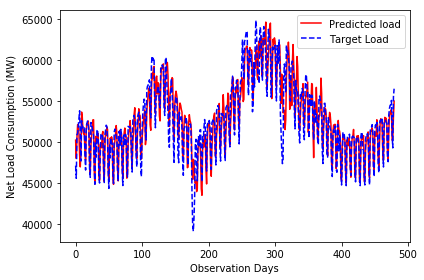

In [185]:
plt.plot(Prediction, 'r-', label='Predicted load')
plt.plot(y_test[:480], 'b--', label='Target Load')
plt.xlabel('Observation Days')
plt.ylabel('Net Load Consumption (MW)')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Net_load_dense.png')
plt.show()


In [21]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()

In [103]:
X_train1.shape

(10982, 59)

In [ ]:
input_shape

In [201]:
X_train1_CNN=tf.placeholder(shape=[batch_size, lookback-1], dtype=tf.float32)
y_train1_CNN=tf.placeholder(shape=[batch_size, 1], dtype=tf.float32)

In [215]:
def conv_layer_2d(input_2d, my_filter):
    input_3d=tf.expand_dims(input_2d, 0)
    input_4d=tf.expand_dims(input_3d, 3)
    convolution_output=tf.nn.conv2d(input_4d, filter=my_filter, strides=[1, 1, 1, 1], padding='SAME')
    conv_output_2d=tf.squeeze(convolution_output)
    return conv_output_2d

def activation(input_2d):
    return(tf.nn.relu(input_2d))

def max_pool(input_2d, width):
    input_4d=tf.expand_dims(input_2d, 0)
    pool_output=tf.nn.max_pool(input_4d, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')
    pool_output_2d=tf.squeeze(pool_output)
    return(pool_output_2d)

my_filter=tf.Variable(tf.random_normal(shape=[4, 4, 1, 10], mean=0.0, stddev=0.1, dtype=tf.float32))
my_convolution_output=conv_layer_2d(X_train1_CNN, my_filter)
my_activation_output=activation(my_convolution_output)
my_maxpool_output=max_pool(my_activation_output, width=2)


In [216]:
final_conv_shape=my_maxpool_output.get_shape().as_list()
final_shape=final_conv_shape[1]*final_conv_shape[2]
flat_output=tf.reshape(my_maxpool_output, [final_conv_shape[0], final_shape])
fully_connected_size1=200
output_dim=1

In [217]:
W1=tf.Variable(tf.truncated_normal([final_shape, fully_connected_size1], mean=0.0, stddev=0.1, dtype=tf.float32))
b1=tf.Variable(tf.truncated_normal([fully_connected_size1], mean=0.0, stddev=0.1, dtype=tf.float32))
h1=tf.nn.relu(tf.add(tf.matmul(flat_output, W1), b1))
W2=tf.Variable(tf.truncated_normal([fully_connected_size1, output_dim], mean=0.0, stddev=0.1, dtype=tf.float32))
b2=tf.Variable(tf.truncated_normal([output_dim], mean=0.0, stddev=0.1, dtype=tf.float32))
Model_output1=tf.add(tf.matmul(h1, W2), b2)

In [211]:
print(Model_output1.shape)

(60, 1)


In [218]:

loss1=tf.reduce_mean(tf.square(Model_output1-y_train1_CNN))
init1=tf.global_variables_initializer()
sess.run(init1)
my_opt1=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_step1=my_opt1.minimize(loss1)

In [219]:
batch_size=lookback
for i in range(len(X_train)):
    rand_index=np.random.choice(len(X_train), size=batch_size)
    rand_x=np.array(X_train1[rand_index])
    #print(rand_x.shape)
    rand_y=np.array(y_train1[rand_index])
   #print(rand_y.shape)
    
    sess.run(train_step1, feed_dict={X_train1_CNN:rand_x, y_train1_CNN:rand_y})
    if i%500==0:
        print('Step # ' + str(i+1) + 'Loss # ' + str(sess.run(loss1, feed_dict={X_train1_CNN:rand_x, y_train1_CNN:rand_y})))

Step # 1Loss # 0.69884247
Step # 501Loss # 0.08096943
Step # 1001Loss # 0.0538769
Step # 1501Loss # 0.0808955
Step # 2001Loss # 0.0554116
Step # 2501Loss # 0.03148586
Step # 3001Loss # 0.015965492
Step # 3501Loss # 0.04811528
Step # 4001Loss # 0.04041975
Step # 4501Loss # 0.02859627
Step # 5001Loss # 0.102413945
Step # 5501Loss # 0.041660156
Step # 6001Loss # 0.06675086
Step # 6501Loss # 0.020945303
Step # 7001Loss # 0.03730259
Step # 7501Loss # 0.07554795
Step # 8001Loss # 0.028488047
Step # 8501Loss # 0.015265851
Step # 9001Loss # 0.02927513
Step # 9501Loss # 0.024502428
Step # 10001Loss # 0.02727403
Step # 10501Loss # 0.043122087


In [221]:
Prediction1=ScalerY.inverse_transform(prediction_result1)
Prediction1=Prediction1.flatten()
len(Prediction1)

480

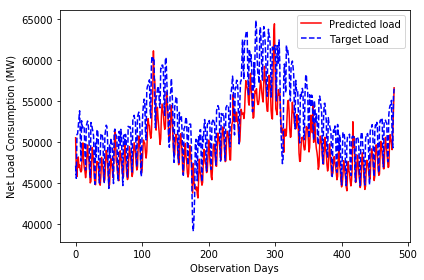

In [223]:
plt.plot(Prediction1, 'r-', label='Predicted load')
plt.plot(y_test[:480], 'b--', label='Target Load')
plt.xlabel('Observation Days')
plt.ylabel('Net Load Consumption (MW)')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Net_load_dense.png')
plt.show()


In [ ]:
X_test=Fit_data[train_len:(len(Fit_data)-lookback)]
y_test=Fit_data[(train_len+lookback):]

print(len(X_test))
print(len(y_test))

In [ ]:
sess=tf.Session()
input_dim=lookback
hidden_dim=100
output_dim=1

X_data=tf.placeholder(tf.float32, shape=[None, input_dim])
y_data=tf.placeholder(tf.float32, shape=[output_dim])

# Introducing First layer 
W1=tf.Variable(tf.random_normal(shape=[input_dim, hidden_dim], mean=0.0, stddev=0.1, dtype=tf.float32))
b1=tf.Variable(tf.random_normal(shape=[hidden_dim], mean=0.0, stddev=0.1, dtype=tf.float32))
h1=tf.nn.tanh(tf.add(tf.matmul(X_data, W1), b1))

# introducing Second layer 

W2=tf.Variable(tf.random_normal(shape=[hidden_dim, output_dim], mean=0.0, stddev=0.1, dtype=tf.float32))
b2=tf.Variable(tf.random_normal(shape=[output_dim], mean=0.0, stddev=0.1, dtype=tf.float32))

Model_output=tf.add(tf.matmul(h1, W2), b2)

loss=tf.reduce_mean(tf.square(Model_output))
init=tf.global_variables_initializer()
sess.run(init)

my_opt=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train_step=my_opt.minimize(loss)


In [ ]:
for i in range(len(X_train)-lookback):
    input_x=np.asmatrix(np.hstack(X_train[i:(i+lookback)]))
    input_y=[y_train[i+1]]
    sess.run(train_step, feed_dict={X_data:input_x, y_data:input_y})
    if i%500==0:
        print('Step #' + str(i+1) + ' Loss # ' + str(sess.run(loss, feed_dict={X_data:input_x, y_data:input_y})))


In [ ]:
prediction_values=[]
for i in range(len(X_test)-lookback):
    input_x=np.asmatrix(np.hstack(X_test[i:(i+lookback)]))
    output=sess.run(Model_output, feed_dict={X_data:input_x})
    prediction_values.append(output)

In [ ]:
pred=scaler1.inverse_transform(prediction_values)
Y_test=scaler1.inverse_transform(y_test)

In [ ]:
prediction=pred.flatten()
Y_test1=Y_test.flatten()
Y_actual=Y_test1[:len(prediction)]

In [ ]:
plt.plot(Y_actual, 'r-')
plt.plot(prediction, 'b--')
plt.show()

In [ ]:
def run_simulation(policy, initial_budget, initial_num_stocks, data1, hist):
    # initializes values that depnd on computing the net worth of a portfolio
    budget=initial_budget
    num_stocks=initial_num_stocks
    share_value=0
    transactions=list()
    next_state_pred=list()
    for i in range(len(data1)-hist-1):
        if i%1000==0:
            print('progress {:.2f}%'.format(float(100*1)/(len(data1)-hist-1)))
            # The state is a hist+2 dimensional vector. You'll force it to be a NumPy matrix. 
            current_state=np.asmatrix(np.hstack((data1[i:i+hist], budget, num_stocks)))
            # calculate the portfolio value
            current_portfolio=budget+ num_stocks*share_value
            # select an action from the current policy
            action=policy.select_action(current_state, i)
            share_value=float(data1[i+hist])
            
        if action=='Rainy' and budget>=share_value:
            budget -=share_value
            num_stocks +=1
            
        elif action == 'Sunny' and num_stocks>0:
            budget += share_value
            num_stocks -=1
        else:
            action="Cloudy"
        
        new_portfolio = budget + num_stocks * share_value
        print(share_value)
        reward=new_portfolio - current_portfolio
        next_state=np.asmatrix(np.hstack((data1[i+1:i+(hist+1)], budget, num_stocks)))
        next_state_pred.append(next_state)
        transactions.append((current_state, action, reward, next_state))
        policy.update_q(current_state, action, reward, next_state)
        
    # compute the final portfolio worth
    portfilio =budget + num_stocks*share_value
    return portfilio, next_state_pred
    
            
            


In [ ]:
def plot_result(data1, data2):
    
    plt.title('Opening vs predicted stock prices')
    plt.xlabel('day')
    plt.ylabel('price, ($)')
    plt.plot(data1, 'b-')
    plt.plot(data2, 'r--')
    plt.savefig('prices.png')
    plt.show()

In [ ]:
def run_simulations(policy, budget, num_stocks, prices, hist):
    num_tries=10
    final_portfolios=list()
    for i in range(0, num_tries):
        final_portfolio, next_state_pred=run_simulation(policy, budget, num_stocks, data1, hist)
        final_portfolios.append(final_portfolio)
        print('Final portfolio: ${}'.format(final_portfolio))
    
    next_state_matrix=np.asarray(next_state_pred)
    next_state_label=next_state_matrix[:,:,2]
    next_state_label=next_state_label.flatten()
    
    plt.title('Final Predicted Value')
    plt.xlabel('Days #')
    plt.ylabel('Price ($)')
    plt.plot(next_state_label, 'r-')
    plt.show()
    return next_state_label
    

In [ ]:
   
        
        
    def ErrorAction_pair(self, current_state, Residual_state):
        Residual_pair=list(np.array(Residual_state).reshape(-1, ))
        threshold=np.sum(Residual_pair)/len(Residual_pair)
    
        weather_list=[]
        for i in range(0, len(Residual_pair)):
         
            if Residual_pair[i]>threshold:
                weather_list.append(self.actions[0])  # it represents sunny day
            
            elif Residual_pair[i]<0.9*threshold:
                weather_list.append(self.actions[1]) # it represents rainy day
            
            else:
                weather_list.append(self.actions[2])  # it represents Cloudy day.
                
        return weather_list
    
    def collect_action(self, current_state):
            action_q_vals=self.sess.run(self.q, feed_dict={self.x:current_state})
            #print(action_q_vals)
            action_idx=np.argmax(action_q_vals)
            value=np.max(action_q_vals)
            action = self.actions[action_idx]
            return action, value
        
    def collect_reward(self, action, next_action):
        if action==next_action:
            reward= 2
           # print("Ok")
        else:
            reward=-1
            #print("Not OK")
        return reward
    
    
    def update_q(self, current_state, action, reward, next_state):
        action_q_vals=self.sess.run(self.q, feed_dict={self.x:current_state}) # look to the current action
        next_action_q_vals=self.sess.run(self.q, feed_dict={self.x:next_state}) # look to the next action
        
        print(action_q_vals)
        # Take maximum generated  from next actions. 
        next_action_idx=np.argmax(next_action_q_vals)
        
        # select again current action 
        current_action_idx=self.actions.index(action)
        print(current_action_idx)
        # update the next action with using reward and gamma value 
        action_q_vals[0, current_action_idx]=reward + self.gamma*next_action_q_vals[0, next_action_idx]
      
        # check the dimension of intermediate matrix 
        action_q_vals=np.squeeze(np.asarray(action_q_vals))
        
        # perfrom again training using  reward functions
        self.sess.run(self.train_op, feed_dict={self.x: current_state, self.y:action_q_vals})
    
            